In [364]:
# Import
%load_ext autoreload
%autoreload 2
# dataset.py에서 파일 output하는 모듈 실행
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import deleteAllOutlier, detectOutlierAmongYear, mergeForecastDataset
from dataset import addOutputDataset
from dataset import makeVisitor
from dataset import makeAtmosphere
from dataset import datasetCombine
from dataset import fillDirtyData
from dataset import discretizeData
from dataset import encodingData


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [365]:
# 데이터 정리 및 합치기
from dataset import visitorProcess


mergeForecastDataset()
addOutputDataset()
makeVisitor()
visitorProcess()
makeAtmosphere()
datasetCombine()

      year  month  day  hour  forecast  value        date  addDate   timestamp
0     2009      1    1   200         4      0  2009-01-01        0  2009-01-01
1     2009      1    1   200         7      0  2009-01-01        0  2009-01-01
2     2009      1    1   200        10      0  2009-01-01        0  2009-01-01
3     2009      1    1   200        13      0  2009-01-01        0  2009-01-01
4     2009      1    1   500         4      0  2009-01-01        0  2009-01-01
...    ...    ...  ...   ...       ...    ...         ...      ...         ...
5467  2009      8   30  2300         4      0  2009-08-30        0  2009-08-30
5468  2009      8   30  2300         7      0  2009-08-30        0  2009-08-30
5469  2009      8   30  2300        10      0  2009-08-30        0  2009-08-30
5470  2009      8   30  2300        13      0  2009-08-30        0  2009-08-30
5471  2009      8   30  2300        16      5  2009-08-30        0  2009-08-30

[5472 rows x 9 columns]
      year  month  day  hou

/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:103: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['date', 'hour']] = df['timestamp'].str.split(" ", 1, expand=True)
/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:103: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['date', 'hour']] = df['timestamp'].str.split(" ", 1, expand=True)
/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:103: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['date', 'hour']] = df['timestamp'].str.split(" ", 1, expand=True)
/Users/seonghoonjeong/Desktop/School/3-1/DataScience

            date  rainfall_min  rainfall_max  rainfall_mean  rainfall_median  \
0     2008-10-01           NaN           NaN            NaN              NaN   
1     2008-10-02           NaN           NaN            NaN              NaN   
2     2008-10-03           NaN           NaN            NaN              NaN   
3     2008-10-04           NaN           NaN            NaN              NaN   
4     2008-10-05           NaN           NaN            NaN              NaN   
...          ...           ...           ...            ...              ...   
3946  2020-01-27           0.0           0.0       0.000000              0.0   
3947  2020-01-28           0.0           0.0       0.000000              0.0   
3948  2020-01-29           0.0           0.0       0.000000              0.0   
3949  2020-01-30           0.0          10.0       0.277778              0.0   
3950  2020-01-31           0.0           0.0       0.000000              0.0   

      probability of precipitation_min 

In [366]:
# 데이터 통계

df = pd.read_csv('assets/output/datasetCombine.csv')

print("combine dataset describe:")
print(df.describe())

print('number of null value:')
print(df.isna().sum())

combine dataset describe:
       rainfall_min  rainfall_max  rainfall_mean  rainfall_median  \
count   2971.000000   2971.000000    2971.000000      2971.000000   
mean       0.049478      6.434870       1.681187         0.959273   
std        0.653848     14.762384       4.691741         4.022666   
min        0.000000      0.000000       0.000000         0.000000   
25%        0.000000      0.000000       0.000000         0.000000   
50%        0.000000      0.000000       0.000000         0.000000   
75%        0.000000      5.000000       1.052632         0.000000   
max       20.000000    100.000000      55.555556        50.000000   

       probability of precipitation_min  probability of precipitation_max  \
count                       3532.000000                       3532.000000   
mean                           7.437712                         38.521801   
std                            9.836432                         27.348446   
min                            0.000000     

In [367]:
# Dirty data 처리, NaN값 전부 drop

fillDirtyData()

df = pd.read_csv('assets/output/datasetCombine.csv')

df.dropna(axis=0, inplace=True)

print(df.isna().sum())

df.to_csv('assets/output/dirtydataResult.csv', index=False)



date                                   0
rainfall_min                           0
rainfall_max                           0
rainfall_mean                          0
rainfall_median                        0
probability of precipitation_min       0
probability of precipitation_max       0
probability of precipitation_mean      0
probability of precipitation_median    0
humidity_min                           0
humidity_max                           0
humidity_mean                          0
humidity_median                        0
highest temperature_min                0
highest temperature_max                0
highest temperature_mean               0
highest temperature_median             0
lowest temperature_min                 0
lowest temperature_max                 0
lowest temperature_mean                0
lowest temperature_median              0
wind speed_min                         0
wind speed_max                         0
wind speed_mean                        0
wind speed_media

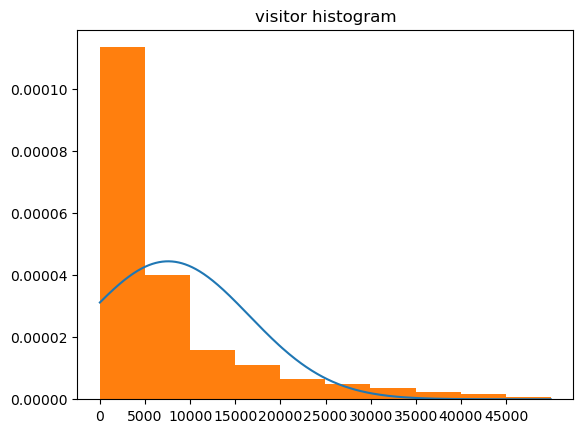

In [368]:
# visitor histogram
from scipy import stats

df['visitor'] = df['visitor'].str.replace(',', '').astype(int)
df = df[df['visitor'] < 50000]

mean = np.mean(df['visitor'])
std = np.std(df['visitor'])
pdf = stats.norm.pdf(df['visitor'].sort_values(), mean, std)

plt.title('visitor histogram')
plt.plot(np.sort(df['visitor']), pdf)
plt.hist(df['visitor'], density=True)
plt.xticks(np.arange(0, 50000,5000))
plt.show()

In [369]:
df = pd.read_csv('assets/output/dirtydataResult.csv')
df['visitor'] = df['visitor'].str.replace(',', '').astype(int)

df.drop(df[df['visitor'] > 30000].index, inplace=True)
print(df.describe())

df.to_csv('assets/output/outlierResult.csv', index=False)

# inputDirs = ['2009', '2010', '2011', '2012', '2013', '2014',
#              '2015', '2016', '2017', '2018', '2019']

# inlier = []
# for year in inputDirs:
#     inlier.append(detectOutlierAmongYear(df, 'visitor', year+'-01-01', year+'-12-31'))

# inlier = pd.concat(inlier)
# inlier.to_csv('assets/output/outlierResult.csv', index=False)



       rainfall_min  rainfall_max  rainfall_mean  rainfall_median  \
count   2548.000000   2548.000000    2548.000000      2548.000000   
mean       0.036107      6.690738       1.757970         1.000981   
std        0.504661     15.324834       4.861055         4.115755   
min        0.000000      0.000000       0.000000         0.000000   
25%        0.000000      0.000000       0.000000         0.000000   
50%        0.000000      0.000000       0.000000         0.000000   
75%        0.000000      5.000000       1.069079         0.000000   
max       10.000000    100.000000      55.555556        50.000000   

       probability of precipitation_min  probability of precipitation_max  \
count                       2548.000000                       2548.000000   
mean                           7.603611                         39.124411   
std                            9.606421                         27.569917   
min                            0.000000                          0.000

In [370]:
# # Feature Outlier 처리
# df = pd.read_csv('assets/output/outlierResult.csv')

# deleteAllOutlier(df)


In [371]:
# Encoding, Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

discretizeData()
encodingData(StandardScaler())

In [372]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

df = pd.read_csv('assets/output/encodingResult.csv')

# X = df.drop(['visitor', 'date'], axis=1)
# Y = df['visitor']
# date = df['date']

# selector = SelectKBest(f_regression,k=40)
# X_new = selector.fit_transform(X, Y)
# print(X_new.shape)

# df = pd.DataFrame(X_new, columns=[X.columns[selector.get_support()]])
# df = pd.concat([date, df, Y], axis=1)

df.to_csv('assets/output/featureSelectionResult.csv', index=False)

(2548, 40)


In [373]:
# # # Feature reduction using PCA
# from sklearn.decomposition import PCA

# df = pd.read_csv('assets/output/featureSelectionResult.csv')

# X = df.drop(['visitor', 'date'], axis=1)
# Y = df['visitor']
# date = df['date']

# pca = PCA(.95)
# pca_result = pca.fit_transform(X)

# plt.plot(pca.explained_variance_ratio_)
# plt.xticks(np.arange(0, 35, 1))

# df_pca = pd.DataFrame(pca_result)

# df = pd.concat([date, df_pca, Y], axis=1)
# df.to_csv('assets/output/pcaResult.csv', index=False)

In [374]:
# # Read dataset and split to train and test data
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/featureSelectionResult.csv')
# dataset = pd.read_csv('assets/output/pcaResult.csv')
#dataset['visitor'] = dataset['visitor'].str.replace(',', '').astype(int)
print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date  ('rainfall_max',)  ('rainfall_mean',)  \
0     2009-01-03           2.173975            4.443795   
1     2009-01-04          -0.110348           -0.253421   
2     2009-01-06           6.089957            5.702703   
3     2009-01-07           2.173975            0.139141   
4     2009-01-10          -0.110348           -0.307568   
...          ...                ...                 ...   
2543  2020-01-27          -0.436680           -0.361715   
2544  2020-01-28          -0.436680           -0.361715   
2545  2020-01-29          -0.436680           -0.361715   
2546  2020-01-30           0.215984           -0.304560   
2547  2020-01-31          -0.436680           -0.361715   

      ('probability of precipitation_min',)  ('humidity_min',)  \
0                                  0.249506          -0.948252   
1                                  1.290681           1.028577   
2                                 -0.791669          -0.289309   
3                          

In [375]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.5370572948752104


In [376]:
# Make the Model
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': np.arange(100,300, 50),
               'max_depth' : np.arange(1, 5, 1),
               'learning_rate': [ 0.001, 0.01, 0.1]
        }

model = GradientBoostingRegressor(random_state=0)

grid_model = GridSearchCV(model, param_grid=grid_params, cv=10, n_jobs=-1)

In [377]:
# Fit the model
from sklearn.metrics import mean_squared_error


grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
최고 예측 정확도: 0.4490


In [378]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_, random_state=0)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.5364891249333541


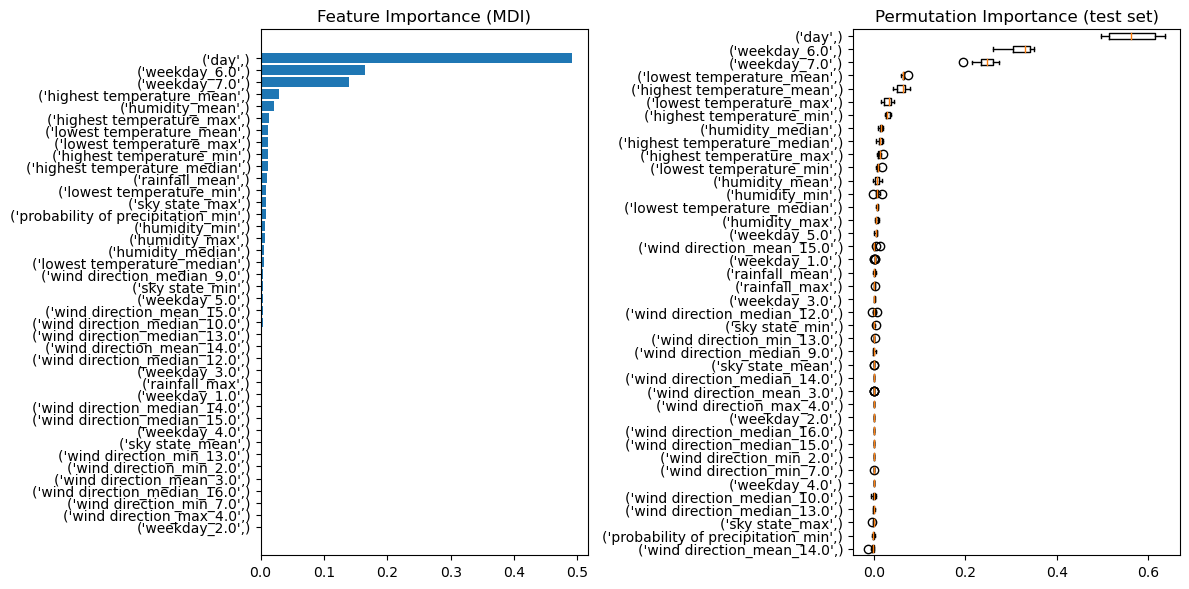

In [379]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [380]:
from sklearn.model_selection import KFold

dataset = pd.read_csv('assets/output/featureSelectionResult.csv')
# dataset = pd.read_csv('assets/output/pcaResult.csv')
#dataset['visitor'] = dataset['visitor'].str.replace(',', '').astype(int)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

best_params = grid_model.best_params_
kfold_model = GradientBoostingRegressor(**best_params, random_state=0)


cv_accuracy=[]
n_iter = 0
for train_index, test_index in kfold.split(X):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = Y[train_index], Y[test_index]
  # 학습 및 예측
  kfold_model.fit(X_train, y_train)
  pred = kfold_model.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(model.score(X_test, y_test), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  cv_accuracy.append(accuracy)
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.5981, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#2 교차 검증 정확도 :0.4623, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#3 교차 검증 정확도 :0.6587, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#4 교차 검증 정확도 :0.7202, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#5 교차 검증 정확도 :0.6588, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#6 교차 검증 정확도 :0.6314, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#7 교차 검증 정확도 :0.697, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#8 교차 검증 정확도 :0.5972, 학습 데이터 크기: 2293, 검증 데이터 크기: 255

#9 교차 검증 정확도 :0.6684, 학습 데이터 크기: 2294, 검증 데이터 크기: 254

#10 교차 검증 정확도 :0.602, 학습 데이터 크기: 2294, 검증 데이터 크기: 254

## 평균 검증 정확도: 0.62941


In [381]:
# reduced_X = X_train.iloc[:, sorted_idx[len(sorted_idx) - 10:-1]]

# model = GradientBoostingRegressor(**grid_model.best_params_)
# model.fit(reduced_X, Y_train)

# print(model.score(X_test.iloc[:, sorted_idx[len(sorted_idx) - 10:-1]], Y_test))